In [2]:
import pandas as pd
df = pd.read_csv('vgsales.csv')
print(df.shape)
df.head(10)

(16598, 11)


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


Column defintions in README.md

## Data Preperation/Cleaning

In [3]:
# show number of null values
null_counts = df.isnull().sum()
null_counts

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [8]:
#drop null values
df = df.dropna()

print(df.shape)
df.head()

(16291, 11)


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [9]:
# number of entries for each year
value_counts = df['Year'].value_counts()
print(value_counts)

Year
2009.0    1431
2008.0    1428
2010.0    1257
2007.0    1201
2011.0    1136
2006.0    1008
2005.0     936
2002.0     829
2003.0     775
2004.0     744
2012.0     655
2015.0     614
2014.0     580
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     342
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: count, dtype: int64


In [10]:
# describe to find min and max values for year
df['Year'].describe()

count    16291.000000
mean      2006.405561
std          5.832412
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

In [ ]:
# drop entries from before 2000
df = df[df['Year'] >= 2000]
df.shape

(14317, 11)

## Initial Visualizations

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

Quick bar plot mock examples comparing sales by genre in North America, Europe, Japan. I would definitely want to take the time to put these side by side (genre is the bin on the x-axis, y-axis is # of sales, and color is the region those sales happened in, like NA_Sales or JP_Sales).

**Re: titles** - it seems that this data does not include recent sales data (kaggle set was updated 9(?) years ago) so we need to filter to have a hard upper limit on that which is statistically valid (there is currently one entry for 2020...). Maybe we should also consider just shifting the year range down to include games from the 90s?

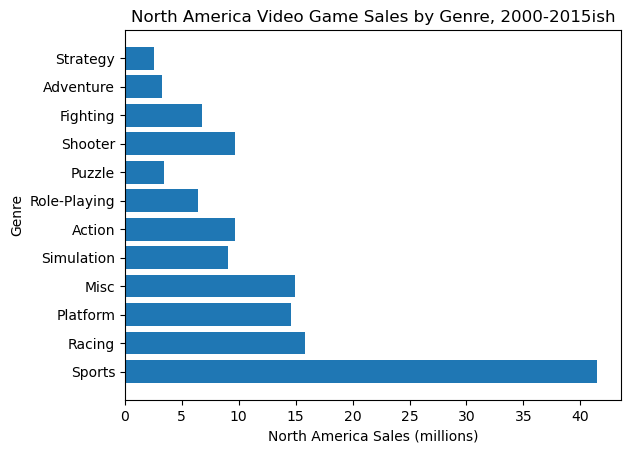

In [36]:
plt.barh(df['Genre'], df['NA_Sales'])
plt.title('North America Video Game Sales by Genre, 2000-2015ish')
plt.xlabel('North America Sales (millions)')
plt.ylabel('Genre')
plt.show()

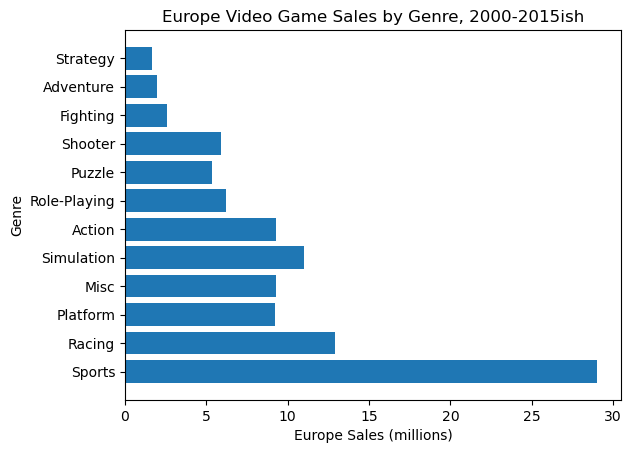

In [37]:
plt.barh(df['Genre'], df['EU_Sales'])
plt.title('Europe Video Game Sales by Genre, 2000-2015ish')
plt.xlabel('Europe Sales (millions)')
plt.ylabel('Genre')
plt.show()

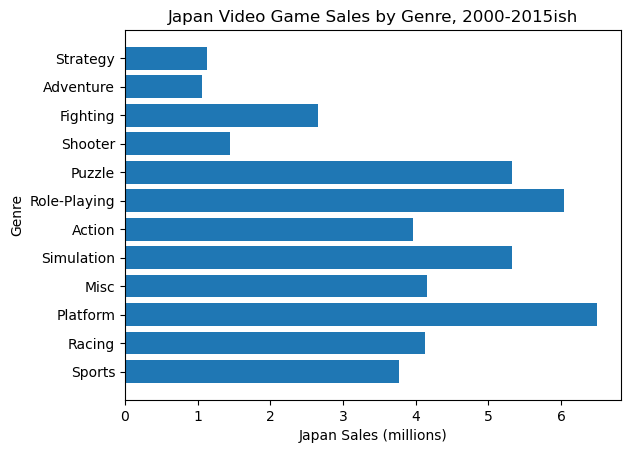

In [39]:
plt.barh(df['Genre'], df['JP_Sales'])
plt.title('Japan Video Game Sales by Genre, 2000-2015ish')
plt.xlabel('Japan Sales (millions)')
plt.ylabel('Genre')
plt.show()

Seaborn default result for a line chart with global sales over time, hue parameter set to the developer (dataset filtered to only include the top five developers). I don't love this, we definitley need to perform some sort of aggregation (the shading indicating range is distracting)

Index(['Electronic Arts', 'Activision', 'Ubisoft', 'Namco Bandai Games',
       'Konami Digital Entertainment'],
      dtype='object', name='Publisher')


Text(0, 0.5, 'Global Sales (Millions)')

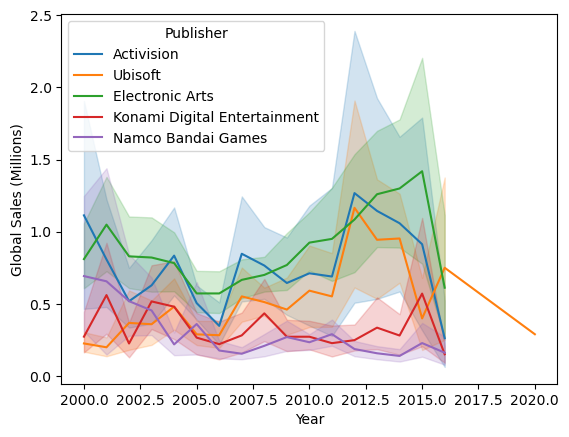

In [20]:
top_five_publishers = df['Publisher'].value_counts().nlargest(5).index
print(top_five_publishers)

df_top_pub = df[df['Publisher'].isin(top_five_publishers)]

sns.lineplot(data=df_top_pub, x='Year', y='Global_Sales', hue='Publisher')
plt.ylabel('Global Sales (Millions)')